In [1]:
import json
import os
from timeit import default_timer as timer

import pandas as pd
import seaborn as sns

import bandit.environment as env
from bandit.logistic import (
    EpsilonGreedyLogisticBandit,
    EpsilonGreedyLogisticPerArmBandit,
    SoftmaxLogisticBandit,
    SoftmaxLogisticPerArmBandit,
)
from bandit.neural_bandit import (
    EpsilonGreedyNeuralBandit,
    EpsilonGreedyNeuralPerArmBandit,
    SoftmaxNeuralBandit,
    SoftmaxNeuralPerArmBandit,
)
from bandit.tree import (
    EpsilonGreedyTreeBandit,
    EpsilonGreedyTreePerArmBandit,
    EpsilonGreedyTreeSamplingBandit,
    SoftmaxTreeBandit,
    SoftmaxTreePerArmBandit,
    SoftmaxTreeSamplingBandit,
)

sns.set_theme()

In [2]:
import json

json_file_name = "contextual_bandit_dynamic.json"
with open(json_file_name, "a+") as f:
    # It goes to the last line
    f.seek(0)
    try:
        data = json.load(f)
    except:
        data = {}
len(data)

28

In [3]:
def save_json():
    with open(json_file_name, "w", encoding="utf-8") as f:
        json.dump(data, f, ensure_ascii=False, indent=4)
    return data

In [4]:
import importlib

import bandit

importlib.reload(bandit.neural_bandit)
importlib.reload(bandit.logistic)

<module 'bandit.logistic' from '/Users/alextanhongpin/Documents/python/python-bandit/bandit/logistic.py'>

In [5]:
class ContextualEpsilonGreedyNeuralBandit(EpsilonGreedyNeuralBandit):
    def __init__(self, actions, epsilon=1.0, *args, **kwargs):
        super().__init__(epsilon, random_state=42, *args, **kwargs)
        self.actions = actions

    def preprocess(self, state: dict[str, str], action):
        return env.preprocess(state, action)

    def predict(self, state: dict[str, str]):
        return super().predict(state, env.actions)


class ContextualEpsilonGreedyNeuralPerArmBandit(EpsilonGreedyNeuralPerArmBandit):
    def __init__(self, actions, epsilon=1.0, *args, **kwargs):
        super().__init__(len(actions), epsilon, random_state=42, *args, **kwargs)
        self.actions = actions

    def fit(self, state: dict[str, str], action: str, reward: float):
        super().fit(state, env.actions.index(action), reward)

    def preprocess(self, state: dict[str, str]):
        action = ""
        return env.preprocess(state, action)

    def predict(self, state: dict[str, str]):
        return super().predict(state, env.actions)


class ContextualEpsilonGreedyLogisticBandit(EpsilonGreedyLogisticBandit):
    def __init__(self, actions, epsilon=1.0, *args, **kwargs):
        super().__init__(epsilon, random_state=42, *args, **kwargs)
        self.actions = actions

    def preprocess(self, state: dict[str, str], action):
        return env.preprocess(state, action)

    def predict(self, state: dict[str, str]):
        return super().predict(state, env.actions)


class ContextualEpsilonGreedyLogisticPerArmBandit(EpsilonGreedyLogisticPerArmBandit):
    def __init__(self, actions, epsilon=1.0, *args, **kwargs):
        super().__init__(len(actions), epsilon, random_state=42, *args, **kwargs)
        self.actions = actions

    def fit(self, state: dict[str, str], action: str, reward: float):
        super().fit(state, env.actions.index(action), reward)

    def preprocess(self, state: dict[str, str]):
        action = ""
        return env.one_hot_encode(state, action)

    def predict(self, state: dict[str, str]):
        return super().predict(state, env.actions)


class ContextualEpsilonGreedyTreeBandit(EpsilonGreedyTreeBandit):
    def __init__(self, actions, epsilon=1.0, *args, **kwargs):
        super().__init__(epsilon, random_state=42, *args, **kwargs)
        self.actions = actions

    def preprocess(self, state: dict[str, str], action):
        return env.preprocess(state, action)

    def predict(self, state: dict[str, str]):
        return super().predict(state, env.actions)


class ContextualEpsilonGreedyTreeSamplingBandit(EpsilonGreedyTreeSamplingBandit):
    def __init__(self, actions, epsilon=1.0, *args, **kwargs):
        super().__init__(epsilon, random_state=42, *args, **kwargs)
        self.actions = actions

    def preprocess(self, state: dict[str, str], action):
        return env.preprocess(state, action)

    def predict(self, state: dict[str, str]):
        return super().predict(state, env.actions)


class ContextualEpsilonGreedyTreePerArmBandit(EpsilonGreedyTreePerArmBandit):
    def __init__(self, actions, epsilon=1.0, *args, **kwargs):
        super().__init__(len(actions), epsilon, random_state=42, *args, **kwargs)
        self.actions = actions

    def fit(self, state: dict[str, str], action: str, reward: float):
        super().fit(state, env.actions.index(action), reward)

    def preprocess(self, state: dict[str, str]):
        action = ""
        return env.one_hot_encode(state, action)

    def predict(self, state: dict[str, str]):
        return super().predict(state, env.actions)

In [6]:
class ContextualSoftmaxNeuralBandit(SoftmaxNeuralBandit):
    def __init__(self, actions, temperature=1.0, *args, **kwargs):
        super().__init__(temperature, random_state=42, *args, **kwargs)
        self.actions = actions

    def preprocess(self, state, action):
        return env.preprocess(state, action)

    def predict(self, state: dict[str, str]):
        return super().predict(state, env.actions)


class ContextualSoftmaxNeuralPerArmBandit(SoftmaxNeuralPerArmBandit):
    def __init__(self, actions, temperature=1.0, *args, **kwargs):
        super().__init__(len(actions), temperature, random_state=42, *args, **kwargs)
        self.actions = actions

    def fit(self, state: dict[str, str], action: str, reward: float):
        super().fit(state, env.actions.index(action), reward)

    def preprocess(self, state: dict[str, str]):
        action = ""
        return env.preprocess(state, action)

    def predict(self, state: dict[str, str]):
        return super().predict(state, env.actions)


class ContextualSoftmaxLogisticBandit(SoftmaxLogisticBandit):
    def __init__(self, actions, temperature=1.0, *args, **kwargs):
        super().__init__(temperature, random_state=42, *args, **kwargs)
        self.actions = actions

    def preprocess(self, state, action):
        return env.preprocess(state, action)

    def predict(self, state: dict[str, str]):
        return super().predict(state, env.actions)


class ContextualSoftmaxLogisticPerArmBandit(SoftmaxLogisticPerArmBandit):
    def __init__(self, actions, temperature=1.0, *args, **kwargs):
        super().__init__(len(actions), temperature, random_state=42, *args, **kwargs)
        self.actions = actions

    def fit(self, state: dict[str, str], action: str, reward: float):
        super().fit(state, env.actions.index(action), reward)

    def preprocess(self, state: dict[str, str]):
        action = ""
        return env.one_hot_encode(state, action)

    def predict(self, state: dict[str, str]):
        return super().predict(state, env.actions)


class ContextualSoftmaxLogisticBandit(SoftmaxLogisticBandit):
    def __init__(self, actions, temperature=1.0, *args, **kwargs):
        super().__init__(temperature, random_state=42, *args, **kwargs)
        self.actions = actions

    def preprocess(self, state, action):
        return env.preprocess(state, action)

    def predict(self, state: dict[str, str]):
        return super().predict(state, env.actions)


class ContextualSoftmaxTreePerArmBandit(SoftmaxTreePerArmBandit):
    def __init__(self, actions, temperature=1.0, *args, **kwargs):
        super().__init__(len(actions), temperature, random_state=42, *args, **kwargs)
        self.actions = actions

    def fit(self, state: dict[str, str], action: str, reward: float):
        super().fit(state, env.actions.index(action), reward)

    def preprocess(self, state: dict[str, str]):
        action = ""
        return env.one_hot_encode(state, action)

    def predict(self, state: dict[str, str]):
        return super().predict(state, env.actions)


class ContextualSoftmaxTreeBandit(SoftmaxTreeBandit):
    def __init__(self, actions, temperature=1.0, *args, **kwargs):
        super().__init__(temperature, random_state=42, *args, **kwargs)
        self.actions = actions

    def preprocess(self, state, action):
        return env.preprocess(state, action)

    def predict(self, state: dict[str, str]):
        return super().predict(state, env.actions)


class ContextualSoftmaxTreeSamplingBandit(SoftmaxTreeSamplingBandit):
    def __init__(self, actions, temperature=1.0, *args, **kwargs):
        super().__init__(temperature, random_state=42, *args, **kwargs)
        self.actions = actions

    def preprocess(self, state, action):
        return env.preprocess(state, action)

    def predict(self, state: dict[str, str]):
        return super().predict(state, env.actions)

In [7]:
N = 5_000
file_name = "contextual_bandit_dynamic.csv"
if not os.path.exists(file_name):
    df = pd.DataFrame(index=range(N))
    df.to_csv(file_name)
else:
    df = pd.read_csv(file_name)
df.head()

,ContextualEpsilonGreedyNeuralBandit_1.0,ContextualEpsilonGreedyNeuralBandit_0.9,ContextualEpsilonGreedyNeuralPerArmBandit_1.0,ContextualEpsilonGreedyNeuralPerArmBandit_0.9,ContextualEpsilonGreedyLogisticBandit_1.0,ContextualEpsilonGreedyLogisticBandit_0.9,ContextualEpsilonGreedyLogisticPerArmBandit_1.0,ContextualEpsilonGreedyLogisticPerArmBandit_0.9,ContextualEpsilonGreedyTreeBandit_1.0,ContextualEpsilonGreedyTreeBandit_0.9,...,ContextualSoftmaxLogisticPerArmBandit_0.2,ContextualSoftmaxLogisticPerArmBandit_0.5,ContextualSoftmaxTreeBandit_0.2,ContextualSoftmaxTreeBandit_0.5,ContextualSoftmaxTreePerArmBandit_0.2,ContextualSoftmaxTreePerArmBandit_0.5,ContextualEpsilonGreedyTreeSamplingBandit_1.0,ContextualEpsilonGreedyTreeSamplingBandit_0.9,ContextualSoftmaxTreeSamplingBandit_0.2,ContextualSoftmaxTreeSamplingBandit_0.5
0,0.000000,0.000000,0.0,1.000000,0.000000,0.0,0.00,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.0,0.000000,1.000000
1,0.500000,0.500000,0.0,0.500000,0.000000,0.0,0.00,0.000000,0.0,0.0,...,0.0,0.500000,0.0,0.0,0.000000,0.000000,0.00,0.0,0.500000,0.500000
2,0.666667,0.666667,0.0,0.333333,0.333333,0.0,0.00,0.333333,0.0,0.0,...,0.0,0.333333,0.0,0.0,0.333333,0.333333,0.00,0.0,0.333333,0.333333
3,0.750000,0.500000,0.0,0.250000,0.500000,0.0,0.25,0.250000,0.0,0.0,...,0.0,0.250000,0.0,0.0,0.250000,0.250000,0.25,0.0,0.250000,0.250000
4,0.800000,0.600000,0.0,0.200000,0.400000,0.0,0.20,0.200000,0.0,0.2,...,0.0,0.400000,0.2,0.0,0.200000,0.400000,0.20,0.0,0.200000,0.200000


In [8]:
def run_simulation(model):
    total_reward = 0
    avg_rewards = []

    for i, ctx in env.random_context(N, random_state=42):
        # 1. Predict the action.
        action = model.predict(ctx)

        # 2. Act and get the reward.
        cost_fn = env.get_cost
        if i > N // 2:
            cost_fn = env.get_cost_new1
        reward = cost_fn(ctx, action)

        # 3. Update the model.
        model.fit(ctx, action, reward)

        # 4. Save the reward.
        total_reward += max(0, reward)
        avg_rewards.append(total_reward / (i + 1))
    return avg_rewards, total_reward

In [9]:
models = [
    # EpsilonGreedy.
    ContextualEpsilonGreedyNeuralBandit(env.actions, epsilon=1.0),
    ContextualEpsilonGreedyNeuralBandit(env.actions, epsilon=0.9),
    ContextualEpsilonGreedyNeuralPerArmBandit(env.actions, epsilon=1.0),
    ContextualEpsilonGreedyNeuralPerArmBandit(env.actions, epsilon=0.9),
    ContextualEpsilonGreedyLogisticBandit(env.actions, epsilon=1.0),
    ContextualEpsilonGreedyLogisticBandit(env.actions, epsilon=0.9),
    ContextualEpsilonGreedyLogisticPerArmBandit(env.actions, epsilon=1.0),
    ContextualEpsilonGreedyLogisticPerArmBandit(env.actions, epsilon=0.9),
    ContextualEpsilonGreedyTreeBandit(env.actions, epsilon=1.0),
    ContextualEpsilonGreedyTreeBandit(env.actions, epsilon=0.9),
    ContextualEpsilonGreedyTreePerArmBandit(env.actions, epsilon=1.0),
    ContextualEpsilonGreedyTreePerArmBandit(env.actions, epsilon=0.9),
    ContextualEpsilonGreedyTreeSamplingBandit(env.actions, epsilon=1.0),
    ContextualEpsilonGreedyTreeSamplingBandit(env.actions, epsilon=0.9),
    # Softmax.
    ContextualSoftmaxNeuralBandit(env.actions, temperature=0.2),
    ContextualSoftmaxNeuralBandit(env.actions, temperature=0.5),
    ContextualSoftmaxNeuralPerArmBandit(env.actions, temperature=0.2),
    ContextualSoftmaxNeuralPerArmBandit(env.actions, temperature=0.5),
    ContextualSoftmaxLogisticBandit(env.actions, temperature=0.2),
    ContextualSoftmaxLogisticBandit(env.actions, temperature=0.5),
    ContextualSoftmaxLogisticPerArmBandit(env.actions, temperature=0.2),
    ContextualSoftmaxLogisticPerArmBandit(env.actions, temperature=0.5),
    ContextualSoftmaxTreeBandit(env.actions, temperature=0.2),
    ContextualSoftmaxTreeBandit(env.actions, temperature=0.5),
    ContextualSoftmaxTreePerArmBandit(env.actions, temperature=0.2),
    ContextualSoftmaxTreePerArmBandit(env.actions, temperature=0.5),
    ContextualSoftmaxTreeSamplingBandit(env.actions, temperature=0.2),
    ContextualSoftmaxTreeSamplingBandit(env.actions, temperature=0.5),
]
# TODO: Benchmark time.
for model in models:
    if (name := model.__name__) in df:
        print("skipping", name)
        # if "Sampling" not in name:
        #     continue
        continue
    start = timer()
    avg_rewards, total_reward = run_simulation(model)
    elapsed = timer() - start
    if name not in data:
        data[name] = {}
    data[name]["elapsed"] = elapsed
    data[name]["total_reward"] = total_reward
    df[name] = avg_rewards
    df.to_csv(file_name, index=False)
    save_json()

skipping ContextualEpsilonGreedyNeuralBandit_1.0
skipping ContextualEpsilonGreedyNeuralBandit_0.9
skipping ContextualEpsilonGreedyNeuralPerArmBandit_1.0
skipping ContextualEpsilonGreedyNeuralPerArmBandit_0.9
skipping ContextualEpsilonGreedyLogisticBandit_1.0
skipping ContextualEpsilonGreedyLogisticBandit_0.9
skipping ContextualEpsilonGreedyLogisticPerArmBandit_1.0
skipping ContextualEpsilonGreedyLogisticPerArmBandit_0.9
skipping ContextualEpsilonGreedyTreeBandit_1.0
skipping ContextualEpsilonGreedyTreeBandit_0.9
skipping ContextualEpsilonGreedyTreePerArmBandit_1.0
skipping ContextualEpsilonGreedyTreePerArmBandit_0.9
skipping ContextualEpsilonGreedyTreeSamplingBandit_1.0
skipping ContextualEpsilonGreedyTreeSamplingBandit_0.9
skipping ContextualSoftmaxNeuralBandit_0.2
skipping ContextualSoftmaxNeuralBandit_0.5
skipping ContextualSoftmaxNeuralPerArmBandit_0.2
skipping ContextualSoftmaxNeuralPerArmBandit_0.5
skipping ContextualSoftmaxLogisticBandit_0.2
skipping ContextualSoftmaxLogisticBan

In [10]:
# Override
# You will get unnamed columns if saved with index=True
# df[[col for col in df.columns if 'Unnamed' not in col]]
# df.to_csv(file_name, index=False)

In [11]:
def plot(*patterns):
    cols = df.columns
    for pat in patterns:
        cols = list(filter(lambda col: pat in col, cols))

    style = []
    for col in cols:
        if "NeuralBandit" in col:
            style.append("-")
        elif "NeuralBanditPerArm" in col:
            style.append(":")
        elif "Tree" in col:
            style.append("--")
        elif "Logistic" in col:
            style.append("-.")
        else:
            style.append("-")
    df[cols].plot(
        figsize=(12, 8),
        style=style,
        xlabel="Trials",
        ylabel="Avg. Rewards",
        title="Contextual Bandit",
    )

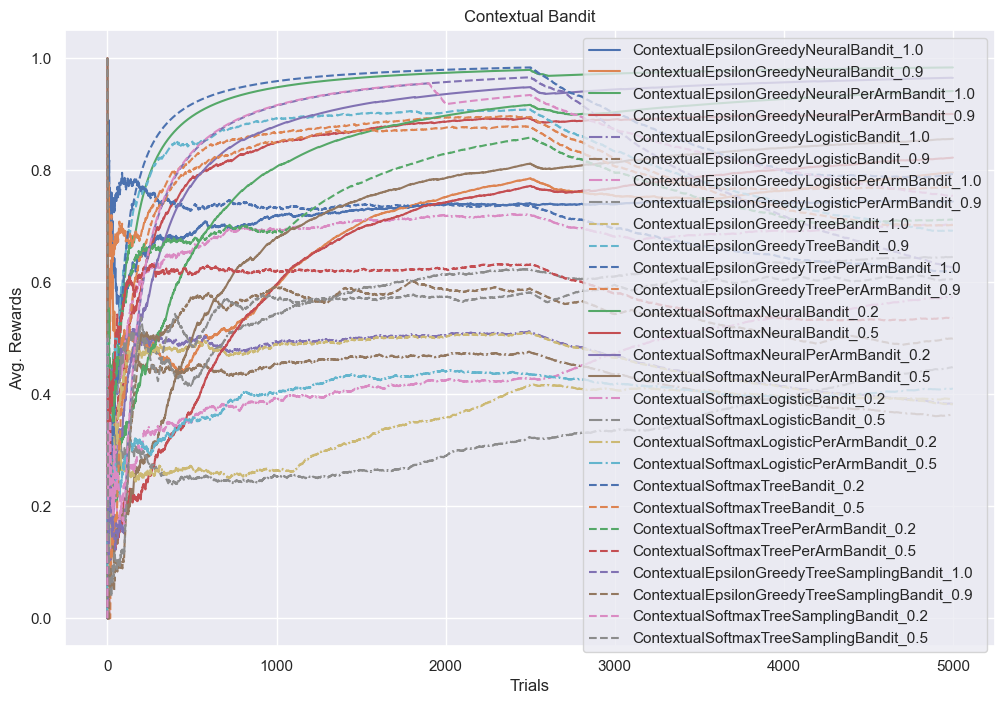

In [12]:
plot()

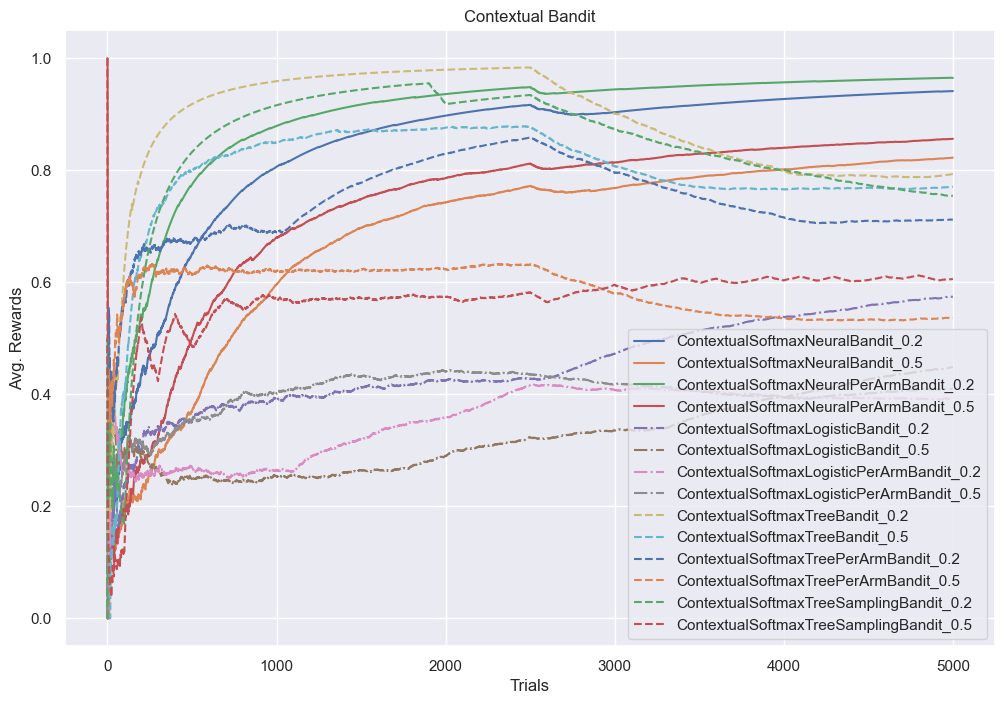

In [13]:
plot("Softmax")

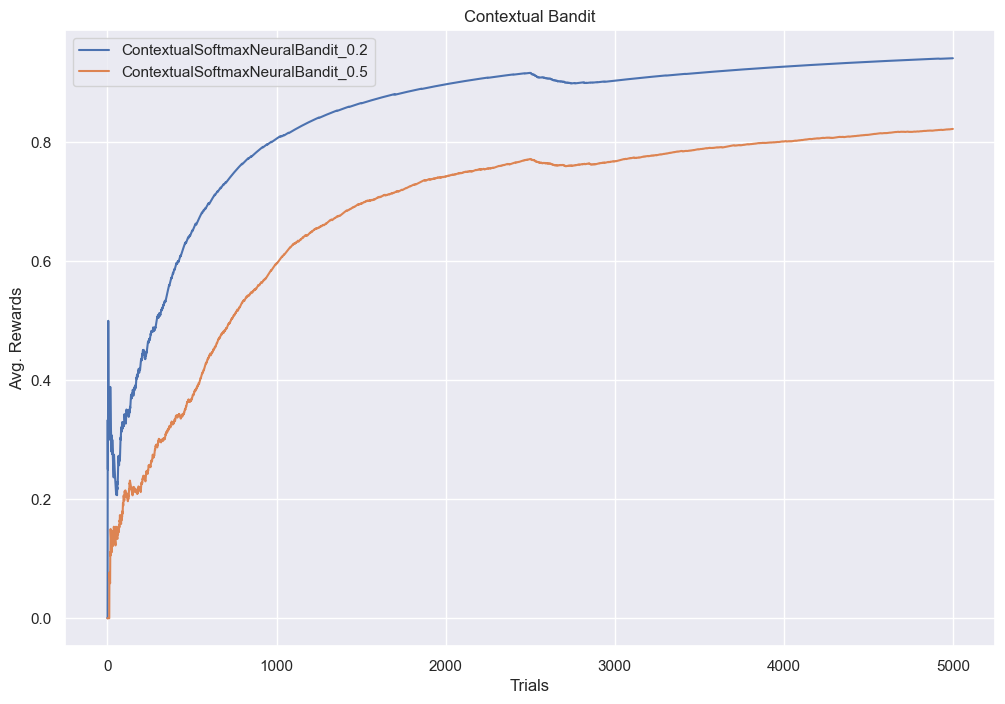

In [14]:
plot("SoftmaxNeuralBandit")

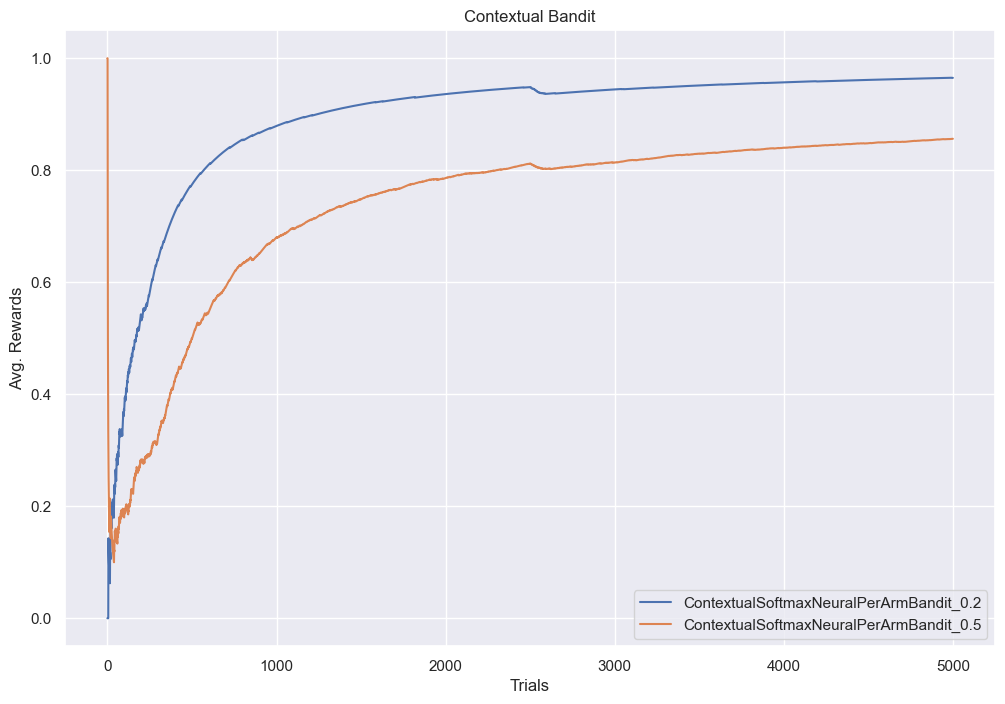

In [15]:
plot("SoftmaxNeuralPerArmBandit")

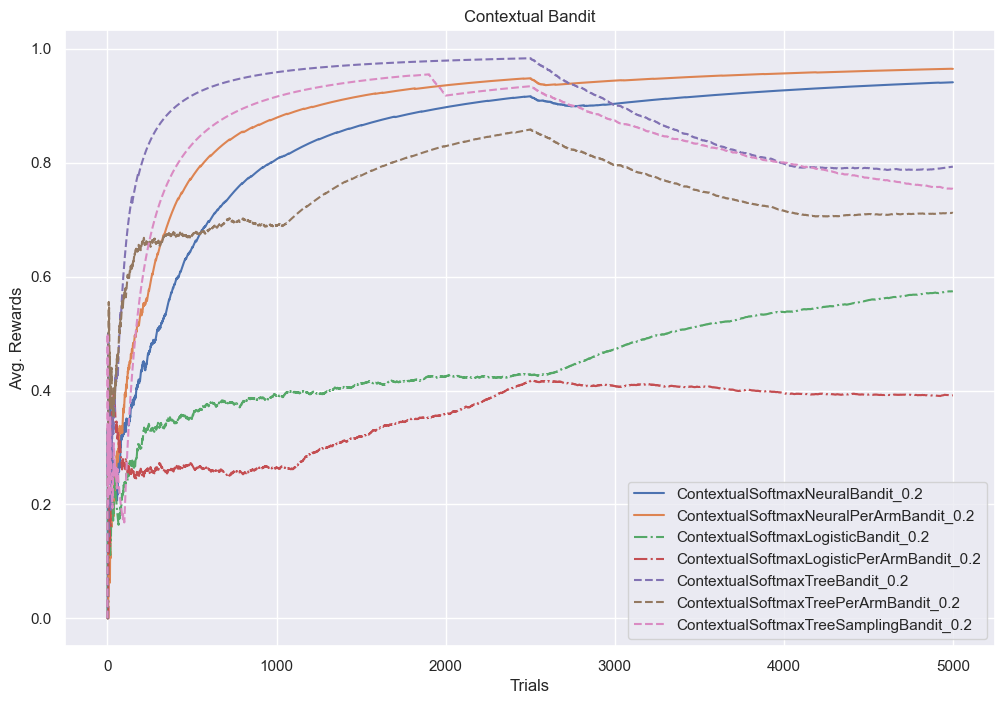

In [16]:
plot("Softmax", "0.2")

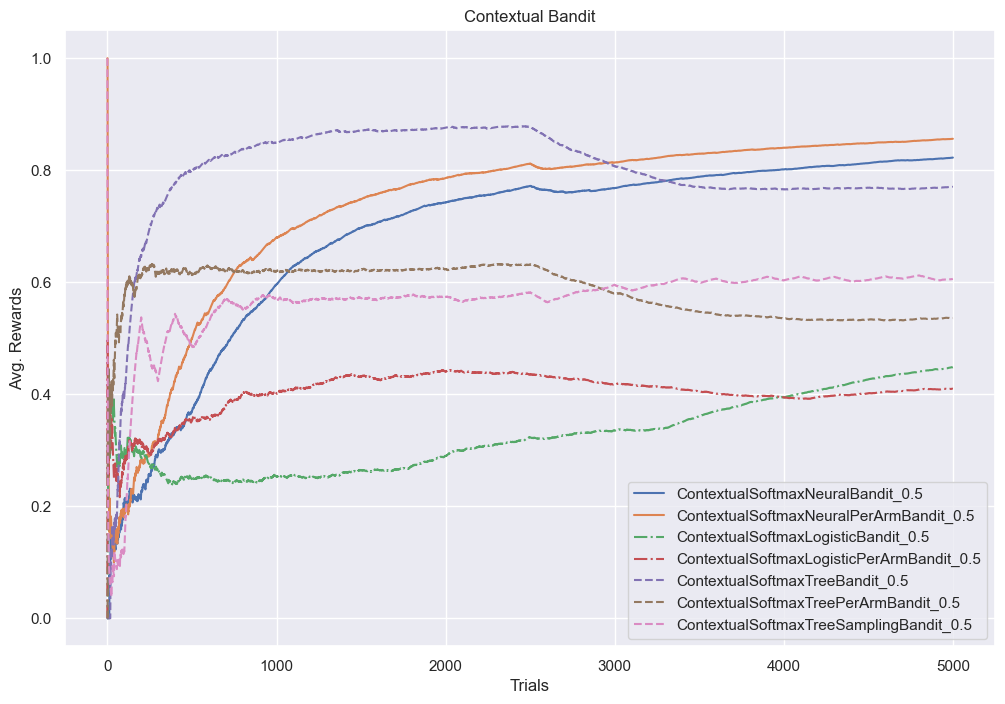

In [17]:
plot("Softmax", "0.5")

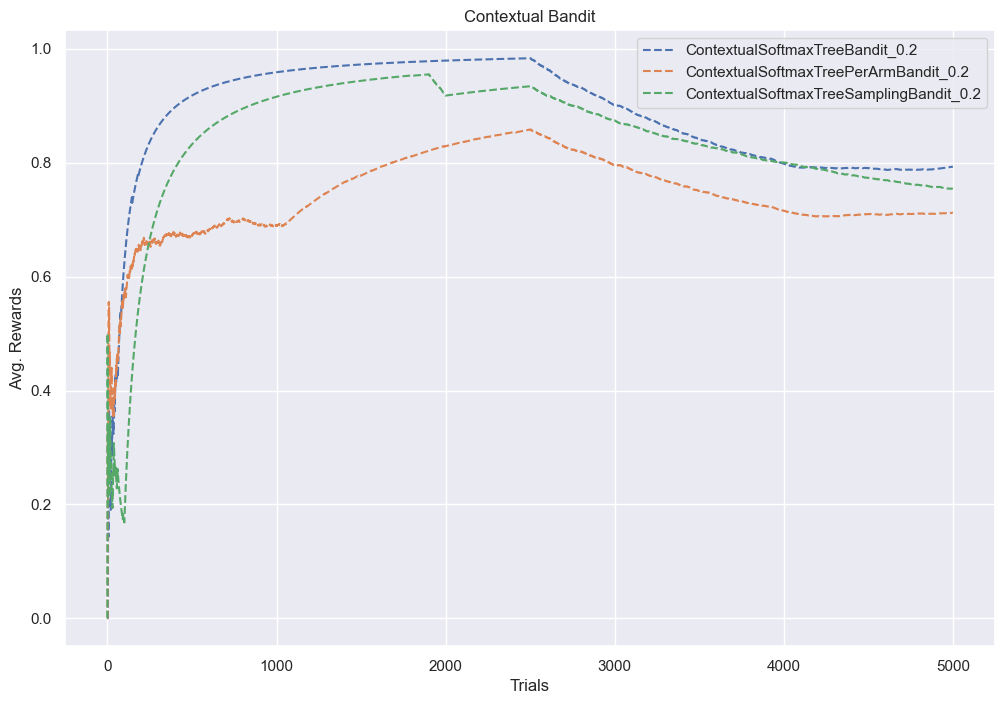

In [18]:
plot("Softmax", "Tree", "0.2")

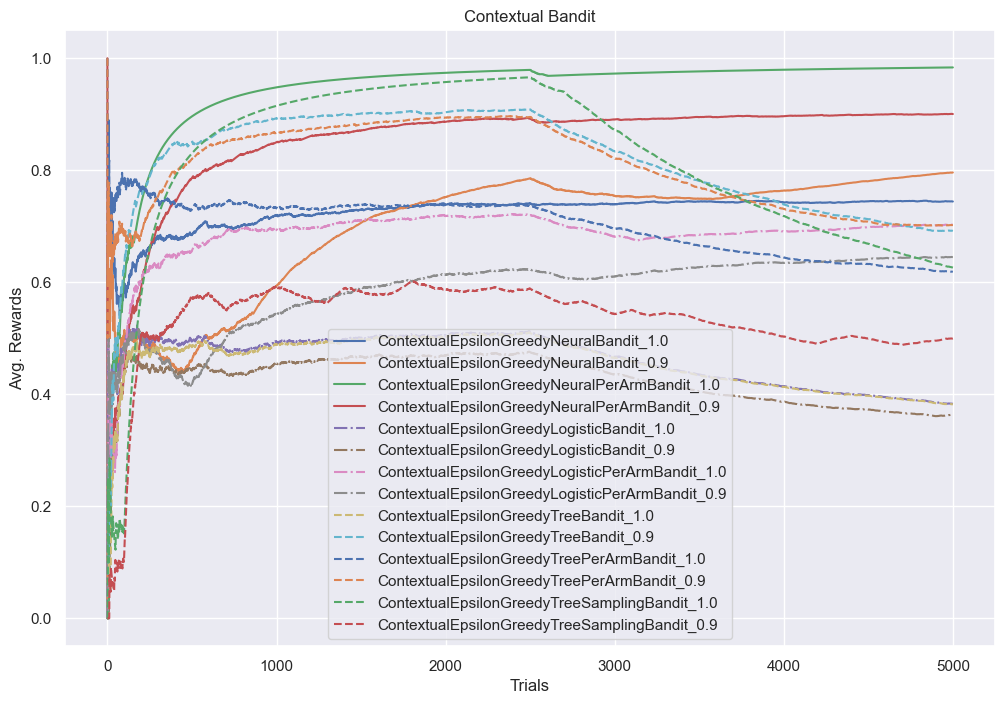

In [19]:
plot("Greedy")

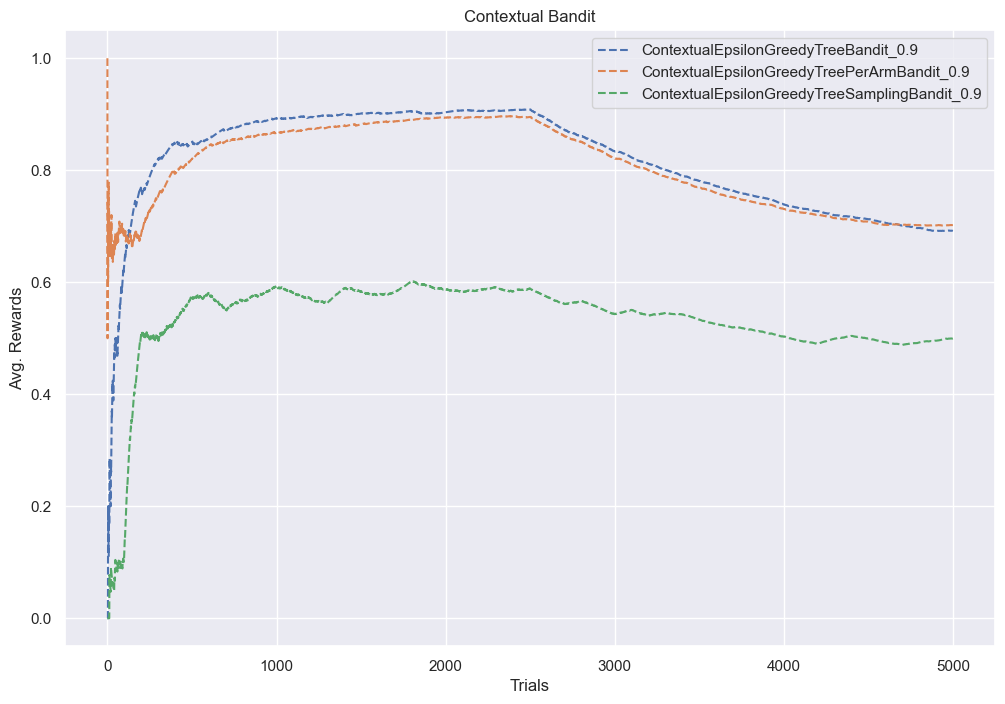

In [20]:
plot("Greedy", "Tree", "0.9")

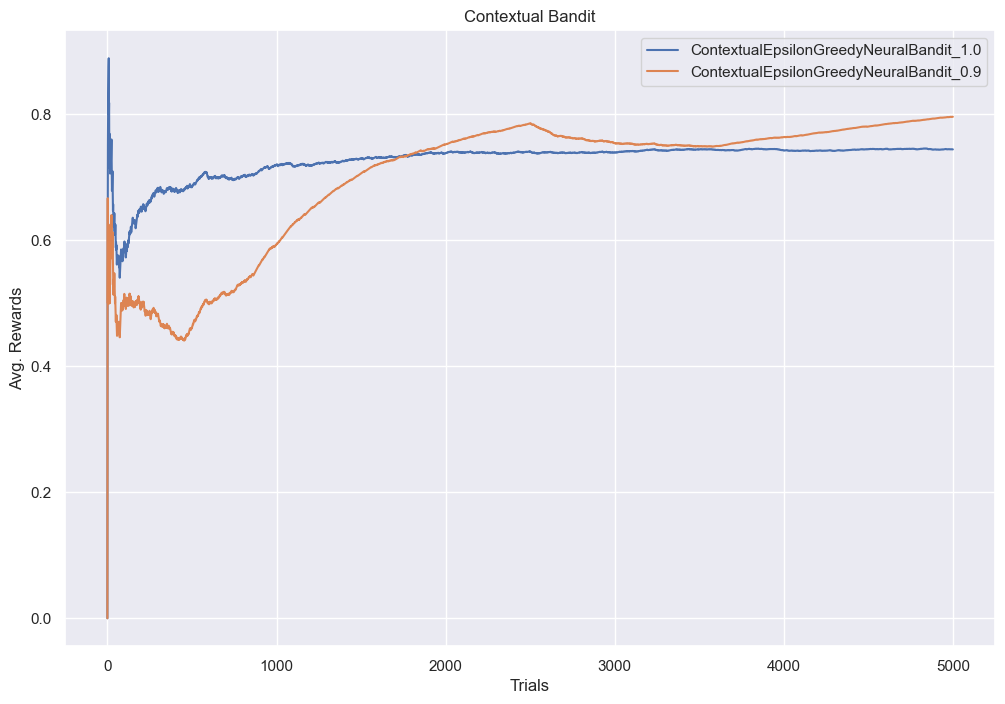

In [21]:
plot("GreedyNeuralBandit")

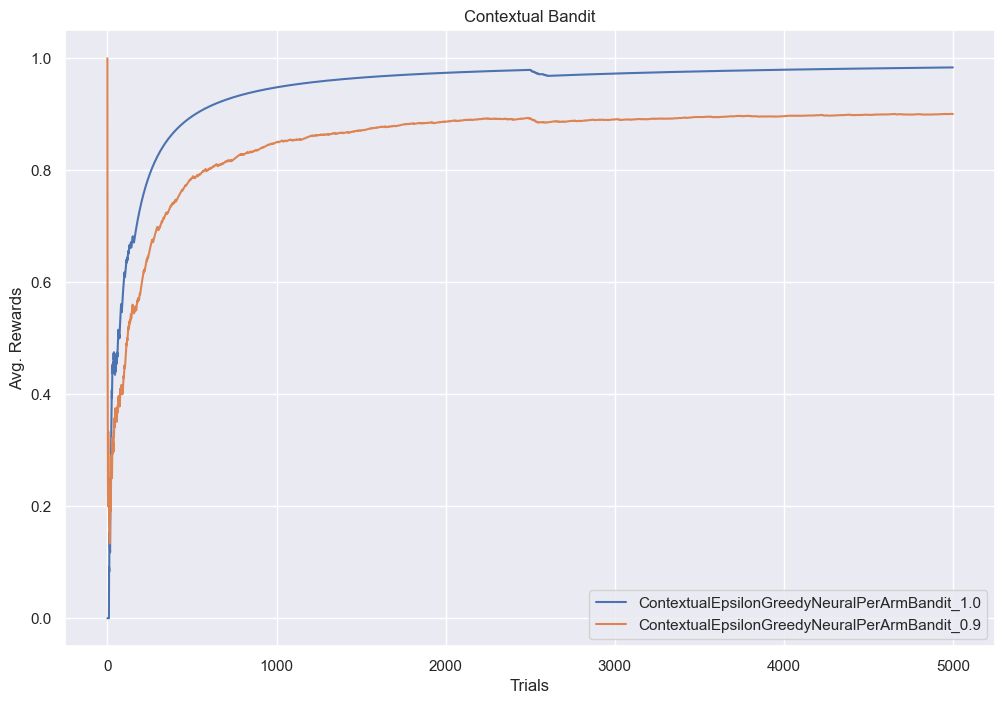

In [22]:
plot("GreedyNeuralPerArmBandit")

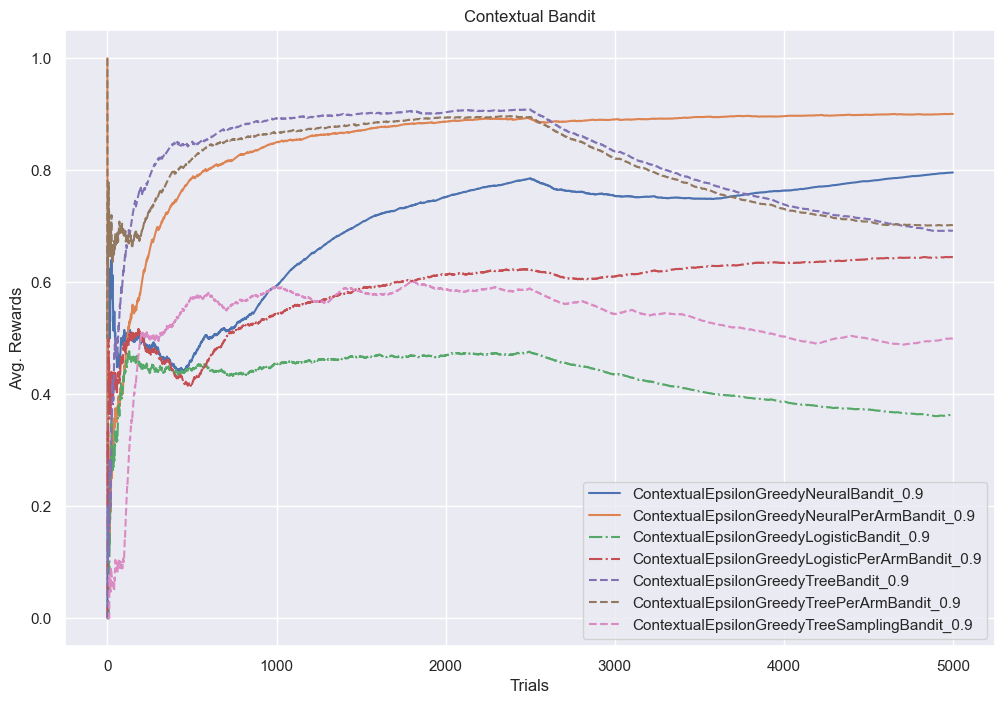

In [23]:
plot("Greedy", "0.9")

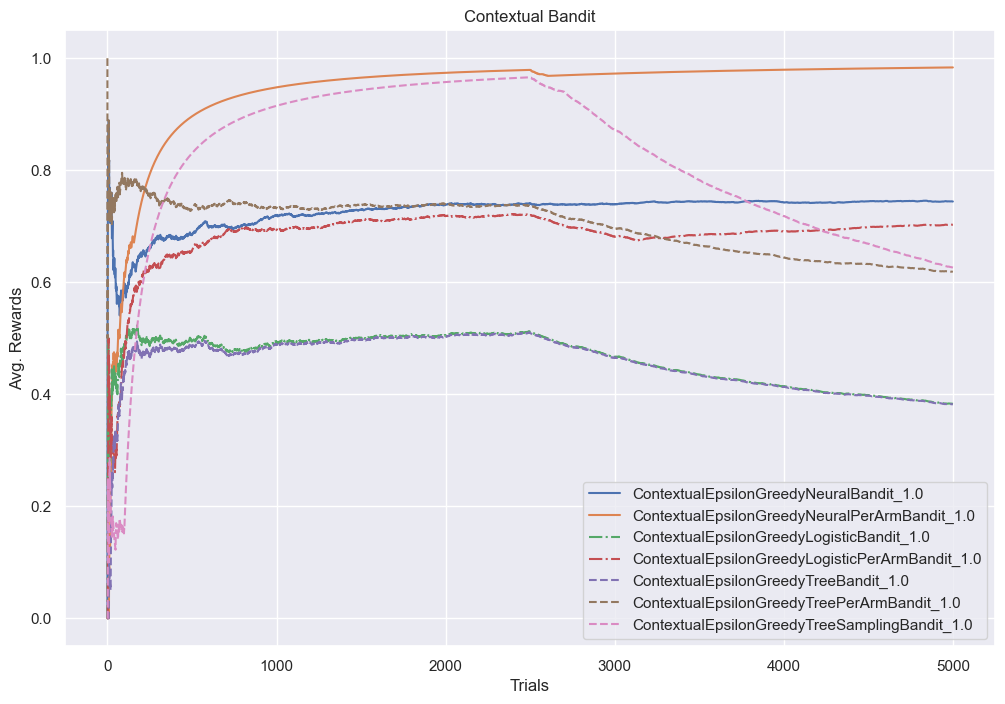

In [24]:
plot("Greedy", "1.0")

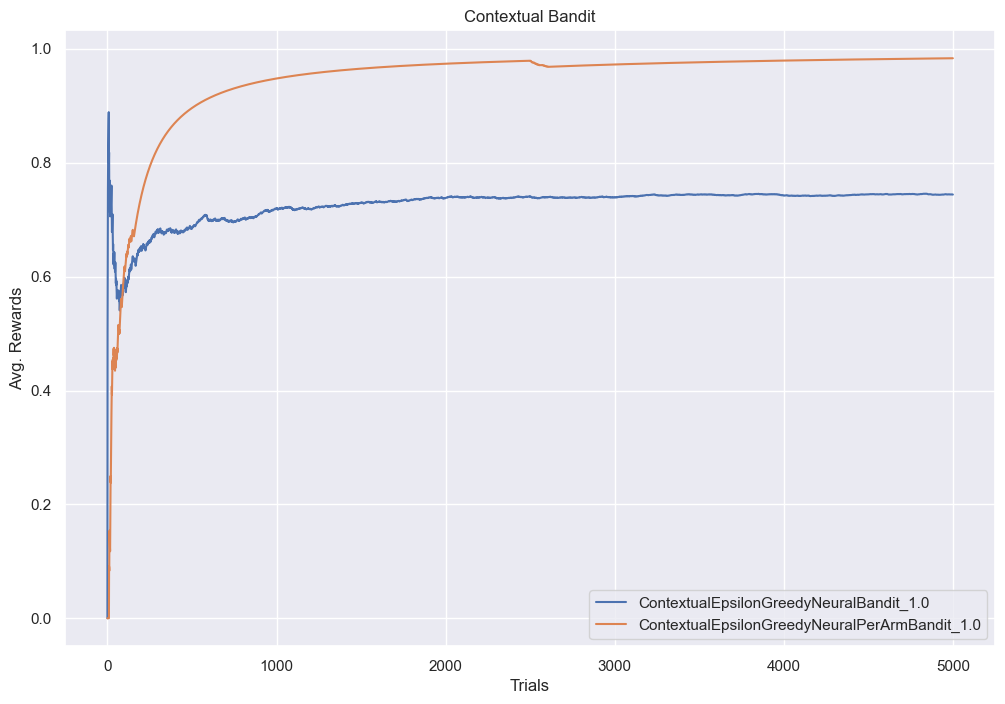

In [25]:
plot("GreedyNeural", "1.0")

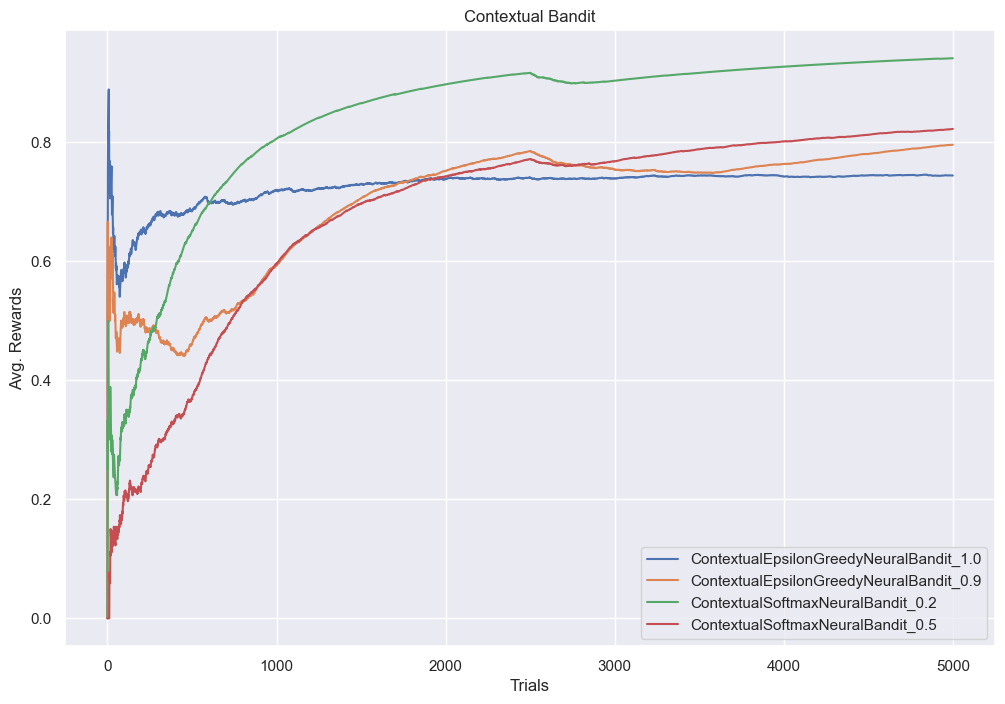

In [26]:
plot("NeuralBandit")

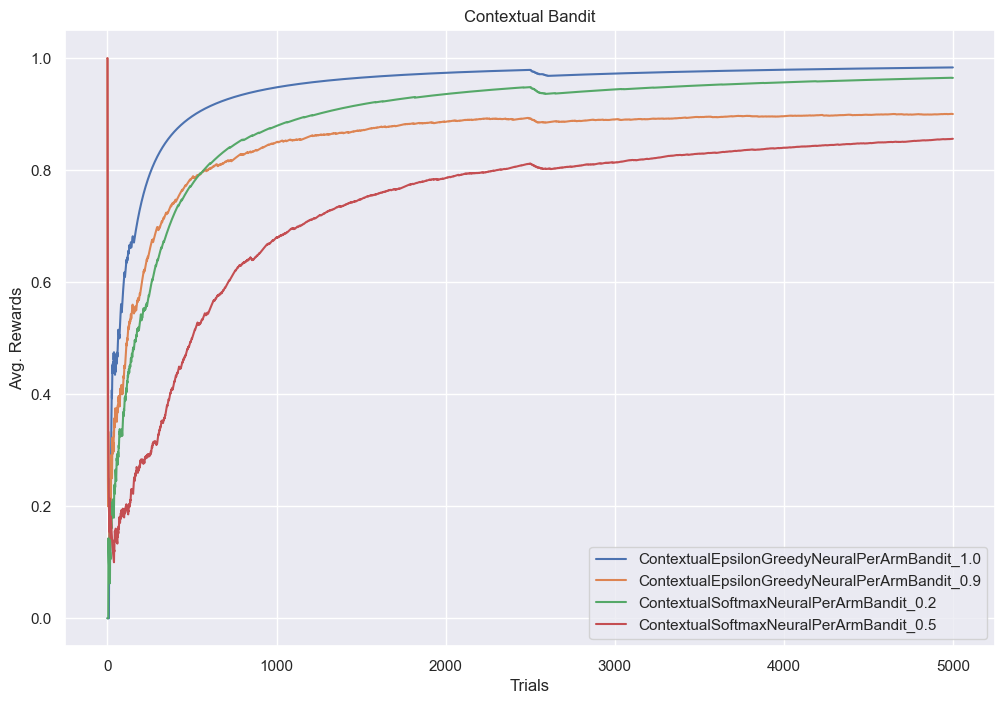

In [27]:
plot("NeuralPerArmBandit")

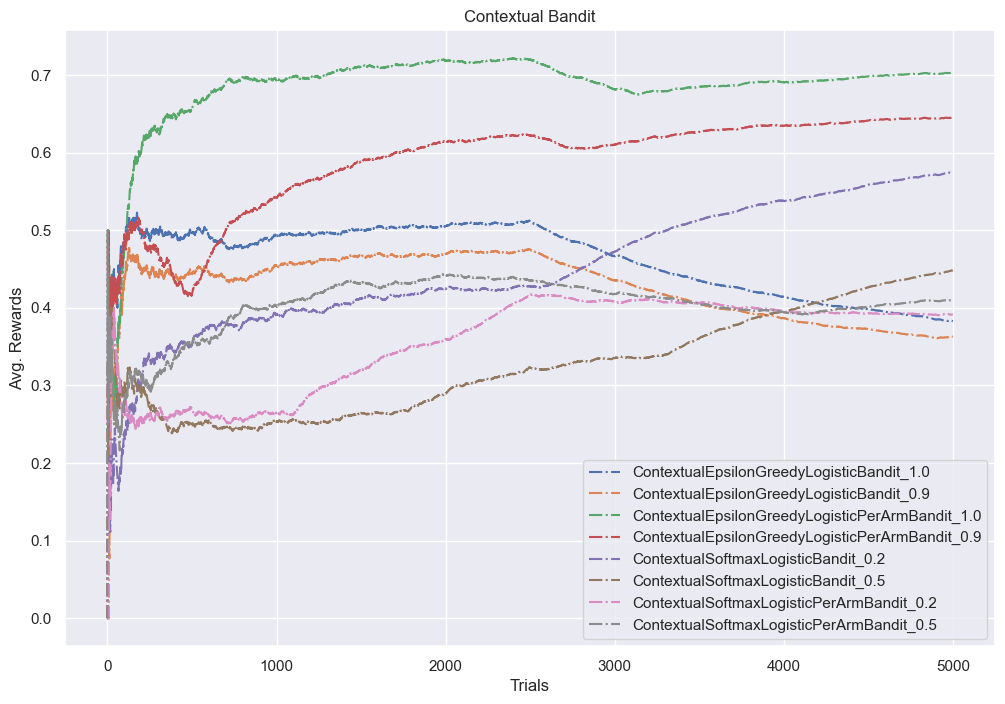

In [28]:
plot("Logistic")

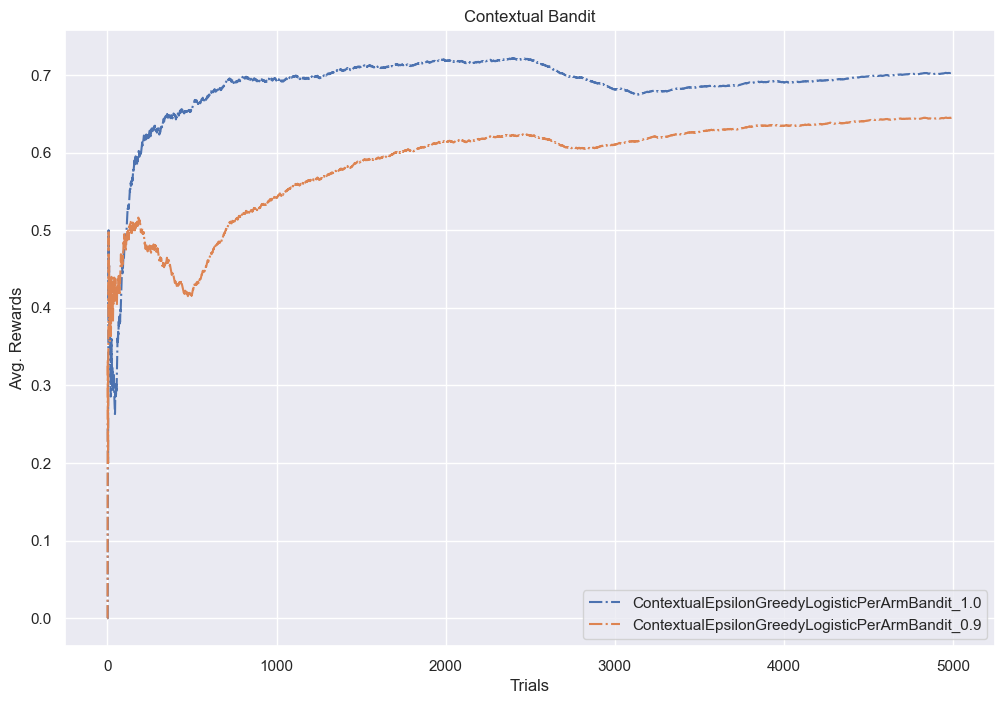

In [29]:
plot("Logistic", "Epsilon", "PerArm")

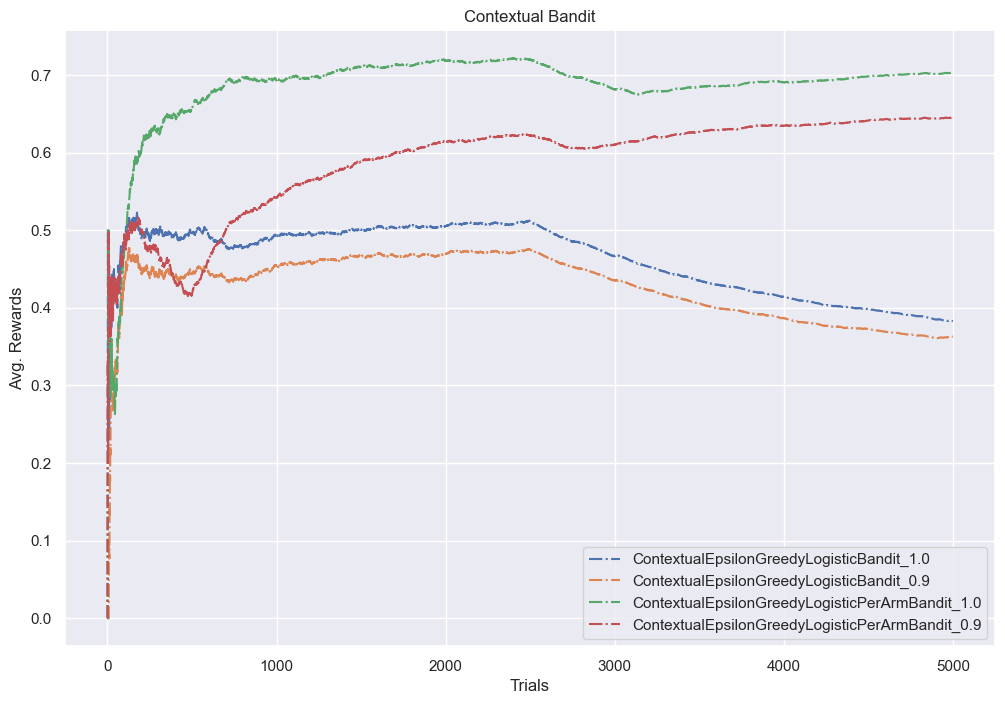

In [30]:
plot("Logistic", "Epsilon")

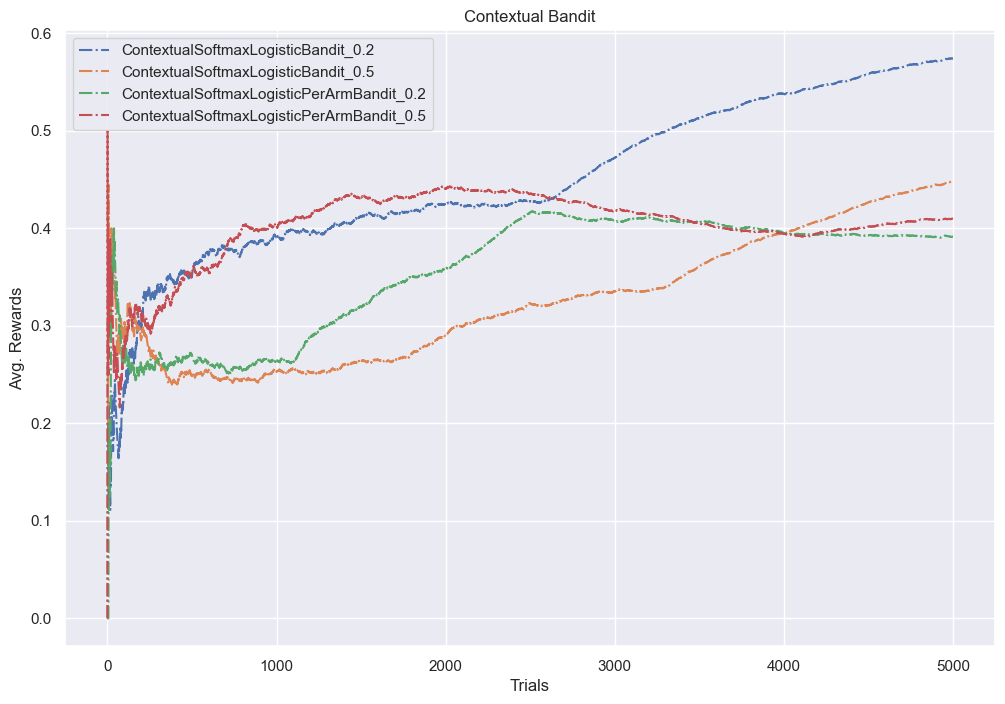

In [31]:
plot("Logistic", "Softmax")

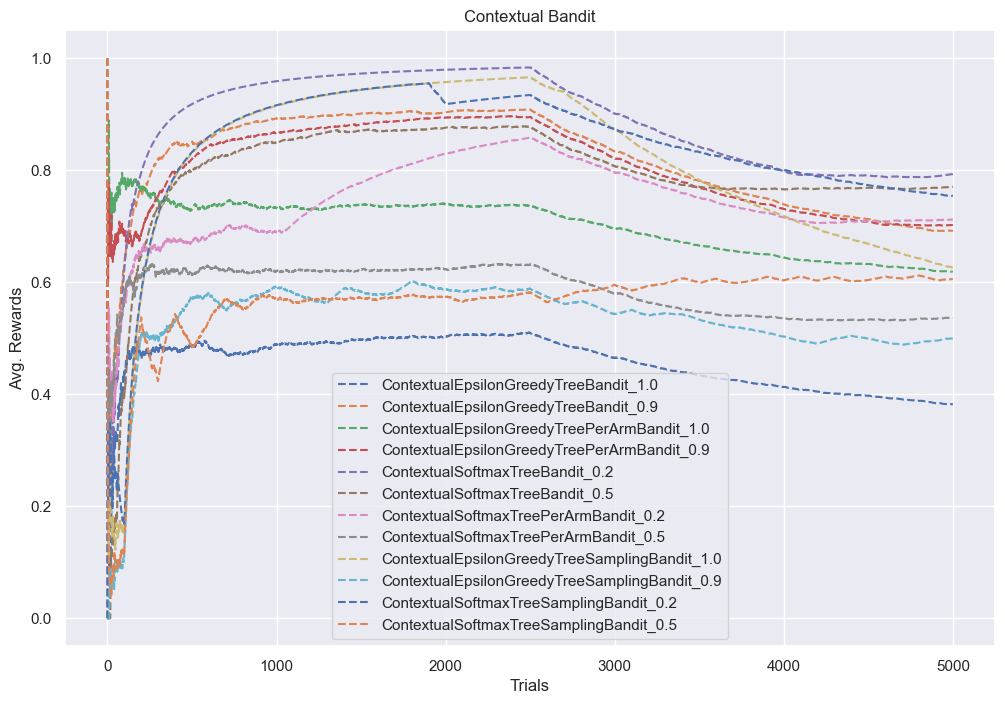

In [32]:
plot("Tree")

In [35]:
model = models[-1]
# model = ContextualEpsilonGreedyTreeBandit(env.actions, epsilon=0.9)

# _, total_reward = run_simulation(model)
# total_reward

In [41]:
ctx = {"user": "Tom", "time_of_day": "morning"}
# 1. Predict the action.
action = model.predict(ctx)

# 2. Act and get the reward.
reward = env.get_cost(ctx, action)
print("Context:", ctx)
print("Action:", action)
print("Reward:", reward)

Context: {'user': 'Tom', 'time_of_day': 'morning'}
Action: finance
Reward: -1.0
